# Introduction to plotting in Python

There are many, many, many packages for making plots in Python. Here we will focus on matplotlib, which is quite widely used and well documented.

`matplotlib` is imported below. 

This line tells Jupyter how handle plots: `%matplotlib inline`

The `inline` option means plots will be included in the notebook as static images.

The `widget` option makes the figures interactive instead. That version would look like: `%matplotlib widget`

In [2]:
from astropy.table import Table

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

## Our first plot

The cell below generate 100 times from 0 to 10 and computes a sine wave using them.

We will plot that data in a moment.

In [11]:
t = np.linspace(0, 10, num=100)
f = 1 / 6
y = np.sin(2 * np.pi * f * t)

The only line actually required below is the one that begins `plt.plot` when using the `inline` display. It is a good habit to create a new figure, though.

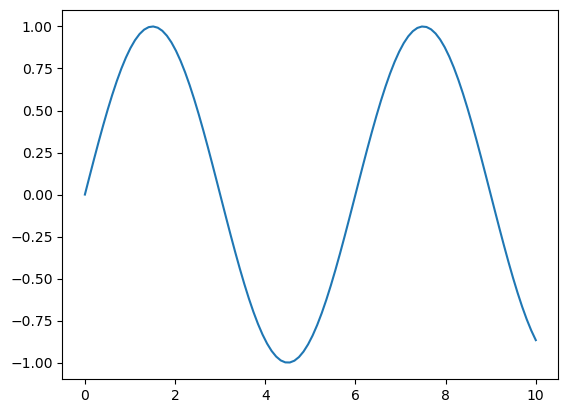

In [12]:
plt.figure()
plt.plot(t, y)

Not a bad plot, but there are several things we should probably add: labels for the axes, maybe a title for the plot, and some grid lines.

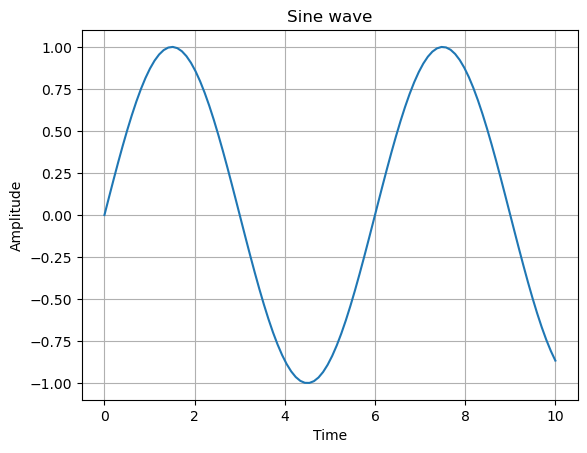

In [13]:
plt.figure()
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave')
plt.grid()

### Plotting with points

Often when plotting data it is preferable to plot the data as points rather than as a line. There are a couple of ways to do that. The easiest is to use `plot`, set the `marker` type, and turn off the line.


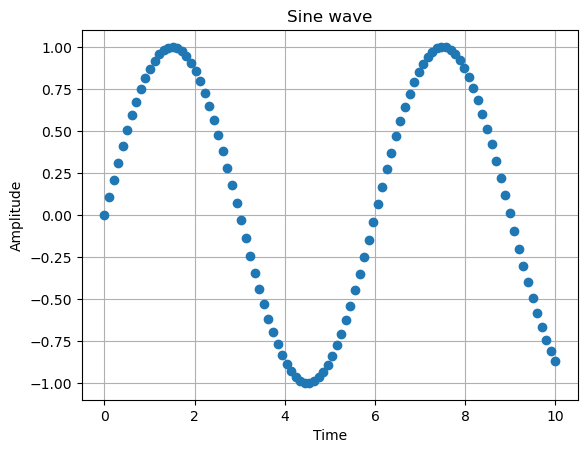

In [14]:
plt.figure()
plt.plot(t, y, marker='o', linestyle='none')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave')
plt.grid()

### Plotting multiple sets a data

Now suppose we want to add another curve to this plot -- in this we will add another sine wave with twice the frequency of the first one.

Adding the second line is straightforward: we add one more `plt.plot` call.

In [15]:
y2 = np.sin( 2 * np.pi * (2 * f) * t)

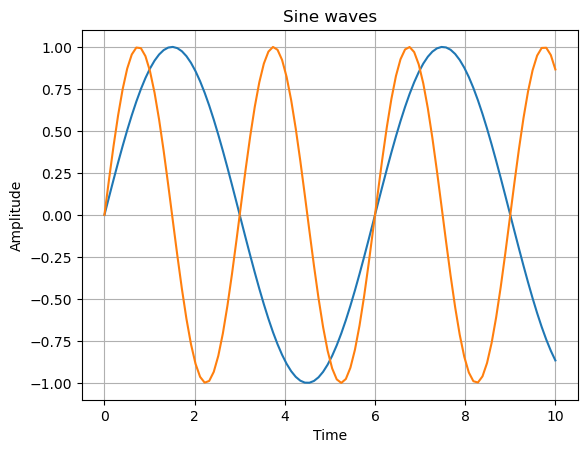

In [16]:
plt.figure()
plt.plot(t, y)

# The new linw is below 
plt.plot(t, y2)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine waves')
plt.grid()

Note that matplotlib has made the new data a different color. The plot looks nice but a legend would help folks understand what they are seeing.

### Adding a legend

The best way to add a legend it modify our `plt.plot` calls by adding a `label` to each one, and then call `plt.legend()`.

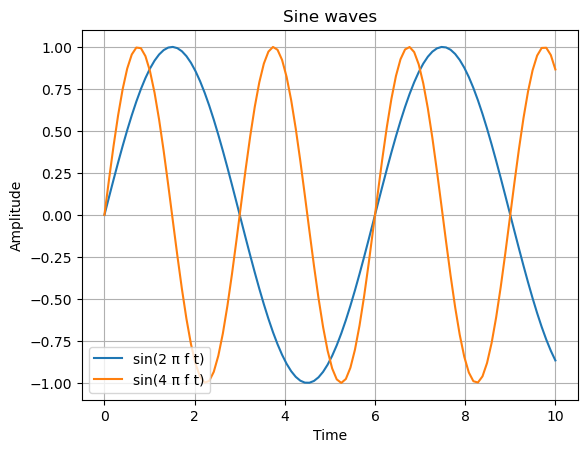

In [17]:
plt.figure()

# Note the addition of the label....
plt.plot(t, y, label='sin(2 π f t)')

# Note the addition of the label....
plt.plot(t, y2, label='sin(4 π f t)')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine waves')

# This displays the legend
plt.legend()

plt.grid()

## Now let's plot some DY Her data from the AAVSO

Out first step is to load that data into an Astropy table.

In [18]:
aavso_dy_her = Table.read('aavsodata_654253b413f61.txt', format='ascii')

Let's see what the names of the columns are.

In [20]:
aavso_dy_her.colnames

['JD',
 'Magnitude',
 'Uncertainty',
 'HQuncertainty',
 'Band',
 'Observer Code',
 'Comment Code(s)',
 'Comp Star 1',
 'Comp Star 2',
 'Charts',
 'Comments',
 'Transfomed',
 'Airmass',
 'Validation Flag',
 'Cmag',
 'Kmag',
 'HJD',
 'Star Name',
 'Observer Affiliation',
 'Measurement Method',
 'Grouping Method',
 'ADS Reference',
 'Digitizer',
 'Credit']

### Magnitude vs time

We have a time column and a magnitude column, so let's plot those.

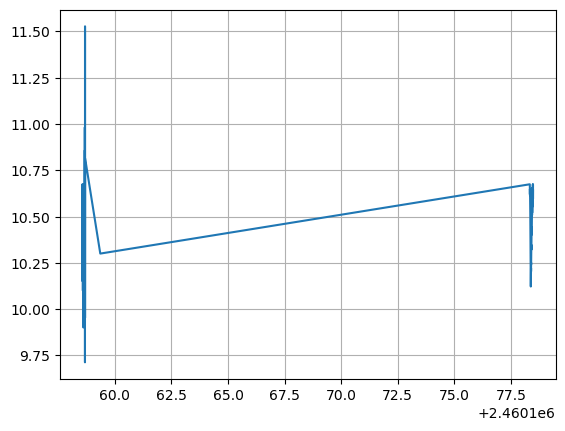

In [26]:
plt.figure()
plt.plot(aavso_dy_her['JD'], aavso_dy_her['Magnitude'])
plt.grid()

That is messy because the data spans several days. We'll look at the first 100 points to see if the plot makes more sense.

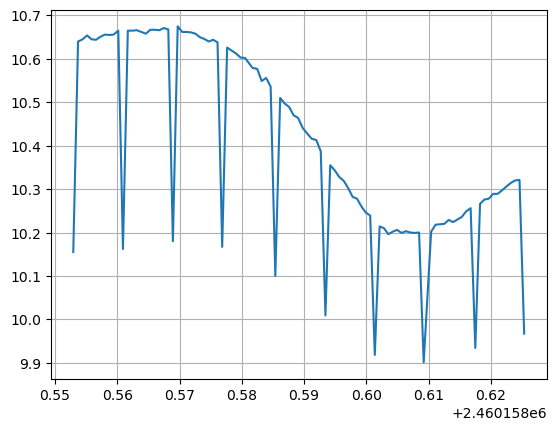

In [27]:
plt.figure()
plt.plot(aavso_dy_her['JD'][:100], aavso_dy_her['Magnitude'][:100])
plt.grid()

Something is odd here; let's look at the data.

In [40]:
aavso_dy_her[:100]

JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,Comments,Transfomed,Airmass,Validation Flag,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
float64,float64,float64,int64,str4,str4,int64,str11,str11,str9,str118,int64,float64,str1,float64,float64,float64,str6,str5,str3,int64,int64,int64,int64
2460158.55293,10.155,0.003,--,I,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.546|CMAGINS=16.772|CREFMAG= 9.355|CREFERR= 0.003|KMAGINS=17.750|KREFMAG=10.321|KREFERR= 0.004,1,1.173,Z,16.772,17.75,--,DY HER,AAVSO,STD,1,--,--,--
2460158.5537,10.64,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.072|CMAGINS=16.889|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.843|KREFMAG=11.431|KREFERR= 0.004,1,1.174,Z,16.889,17.843,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55443,10.645,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.092|CMAGINS=16.905|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.866|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.175,Z,16.905,17.866,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55515,10.654,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.082|CMAGINS=16.886|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.848|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.176,Z,16.886,17.848,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55588,10.645,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.077|CMAGINS=16.890|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.856|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.177,Z,16.89,17.856,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55659,10.644,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.068|CMAGINS=16.883|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.851|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.178,Z,16.883,17.851,--,DY HER,AAVSO,STD,1,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460158.62108,10.289,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=16.752|CMAGINS=16.917|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.883|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.359,Z,16.917,17.883,--,DY HER,AAVSO,STD,9,--,--,--
2460158.62178,10.297,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=16.751|CMAGINS=16.909|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.872|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.362,Z,16.909,17.872,--,DY HER,AAVSO,STD,9,--,--,--


The data has multiple filters. We should really plot those as separate lines.

To do that, we will use boolean indexing to get just the V data and just the I data.

In [29]:
# This will be True for every row of V data and False otherwise
just_V = aavso_dy_her['Band'] == 'V'

# This will be True for every row of I data and False otherwise
just_I = aavso_dy_her['Band'] == 'I'

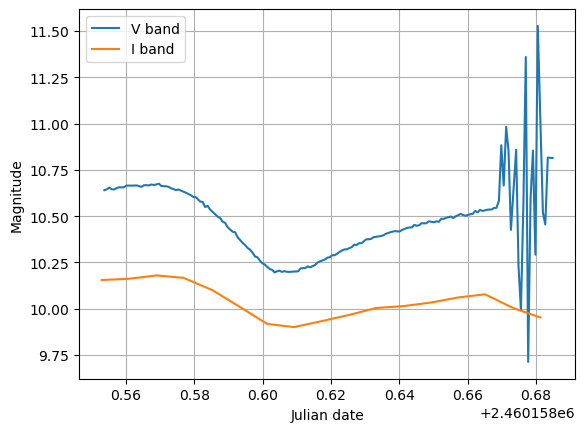

In [31]:
plt.figure()
plt.plot(aavso_dy_her['JD'][just_V], 
         aavso_dy_her['Magnitude'][just_V],
         label='V band')
plt.plot(aavso_dy_her['JD'][just_I], 
         aavso_dy_her['Magnitude'][just_I],
         label='I band')
plt.legend()
plt.xlabel('Julian date')
plt.ylabel('Magnitude')
plt.grid()

What is going on at the end??

Perhaps the V data is from two different observers. Let's take a look.

In [32]:
aavso_dy_her[just_V]

JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,Comments,Transfomed,Airmass,Validation Flag,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
float64,float64,float64,int64,str4,str4,int64,str11,str11,str9,str118,int64,float64,str1,float64,float64,float64,str6,str5,str3,int64,int64,int64,int64
2460158.5537,10.64,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.072|CMAGINS=16.889|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.843|KREFMAG=11.431|KREFERR= 0.004,1,1.174,Z,16.889,17.843,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55443,10.645,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.092|CMAGINS=16.905|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.866|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.175,Z,16.905,17.866,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55515,10.654,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.082|CMAGINS=16.886|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.848|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.176,Z,16.886,17.848,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55588,10.645,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.077|CMAGINS=16.890|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.856|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.177,Z,16.89,17.856,--,DY HER,AAVSO,STD,1,--,--,--
2460158.55659,10.644,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.068|CMAGINS=16.883|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.851|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.178,Z,16.883,17.851,--,DY HER,AAVSO,STD,1,--,--,--
2460158.5573,10.651,0.003,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=17.067|CMAGINS=16.874|CREFMAG=10.474|CREFERR= 0.003|KMAGINS=17.837|KREFMAG=11.431|KREFERR= 0.004|TV_VI=0.0269,1,1.179,Z,16.874,17.837,--,DY HER,AAVSO,STD,1,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460158.67912,10.854,0.011,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=19.214|CMAGINS=18.817|CREFMAG=10.474|CREFERR= 0.009|KMAGINS=19.893|KREFMAG=11.431|KREFERR= 0.015|TV_VI=0.0269,1,1.816,Z,18.817,19.893,--,DY HER,AAVSO,STD,16,--,--,--
2460158.67983,10.292,0.009,--,V,MZK,--,000-BBX-643,000-BJR-400,X28007GC,|VMAGINS=18.865|CMAGINS=19.030|CREFMAG=10.474|CREFERR= 0.010|KMAGINS=19.818|KREFMAG=11.431|KREFERR= 0.014|TV_VI=0.0269,1,1.825,Z,19.03,19.818,--,DY HER,AAVSO,STD,16,--,--,--


It looks like the later data is simply more noisy.

### Plots with error bars

Plotting with error bars is very similar to making the plots we've made so far.

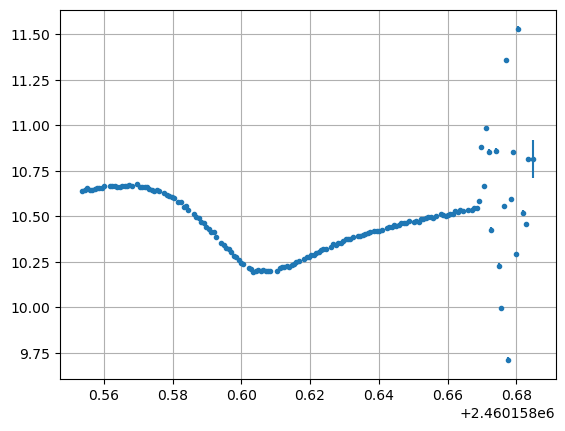

In [36]:
plt.figure()
plt.errorbar(aavso_dy_her['JD'][just_V], 
             aavso_dy_her['Magnitude'][just_V],
             yerr=aavso_dy_her['Uncertainty'][just_V],
             fmt='.'
            )

plt.grid()    

It still isn't clear what happens at the end of the night, though I'm sure that is something we have all experienced!

To wrap this part up, let's exclude data after Julian date `2460158.67`

In [37]:
good_data = aavso_dy_her['JD'] < 2460158.67

good_I = good_data & just_I
good_V = good_data & just_V

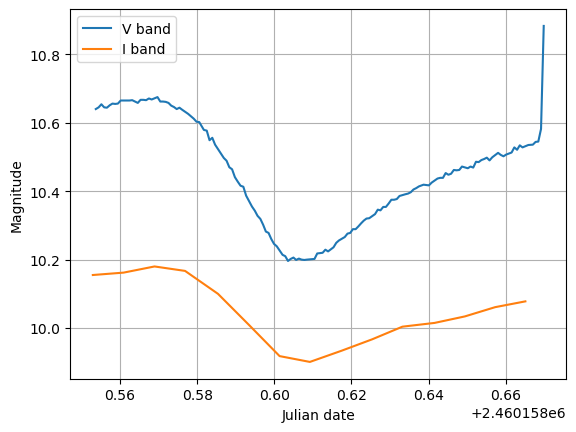

In [38]:
plt.figure()
plt.plot(aavso_dy_her['JD'][good_V], 
         aavso_dy_her['Magnitude'][good_V],
         label='V band')
plt.plot(aavso_dy_her['JD'][good_I], 
         aavso_dy_her['Magnitude'][good_I],
         label='I band')
plt.legend()
plt.xlabel('Julian date')
plt.ylabel('Magnitude')
plt.grid()

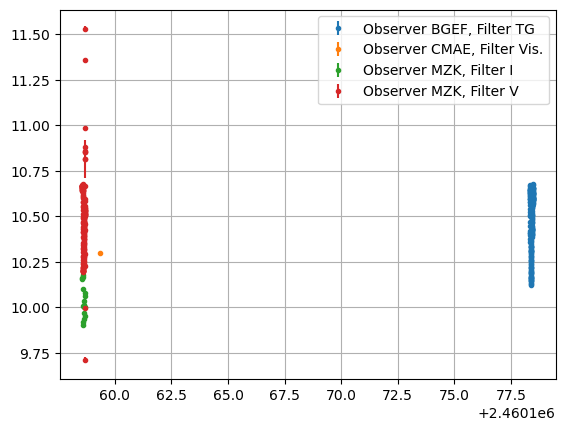

In [46]:
dy_her_by_obsever = aavso_dy_her.group_by(['Observer Code', 'Band'])

plt.figure()

for key, data in zip(dy_her_by_obsever.groups.keys, dy_her_by_obsever.groups):
    plt.errorbar(data['JD'], 
                 data['Magnitude'], 
                 yerr=data['Uncertainty'], 
                 fmt='.', 
                 label=f'Observer {key[0]}, Filter {key[1]}')
    
plt.legend()
plt.grid()

### DY Her and other data from MSUM

Recall that in the data from MSUM was measurements of the brightness of another variable, `ROTSE1 J163126.35+121920.7`. We saved the data on just that star in the file `star_5.ecsv`. Let's load it and make a plot.

In [47]:
rotse_data = Table.read('star_5.ecsv')

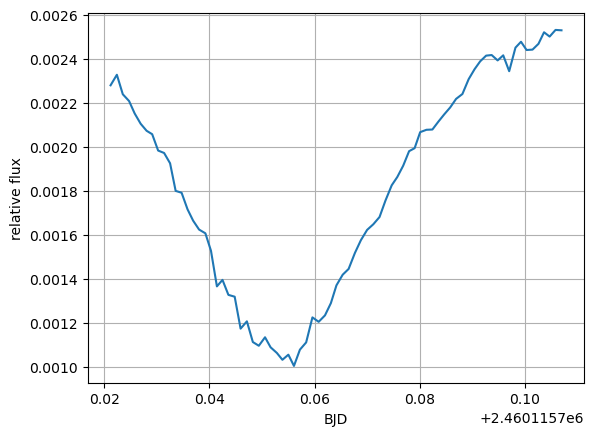

In [49]:
plt.figure()
plt.plot(rotse_data['BJD'], rotse_data['relative_flux'])
plt.xlabel('BJD')
plt.ylabel('relative flux')
plt.grid()